
<center><h1 style="font-family: 'Cursive';">A model that predicts whether a
passenger on the Titanic survived or not</h1></center>
r>
div>


#### Before starting out with the actual Data Modelling of the titanic data set, it is important that we import all the necessary libraries required for the task at hand.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1-LOAD THE DATASET

#### We'll import the dataset under the name "data" from the csv file that is stored on our system. This data will be loaded into the RAM, as we explore it.

In [17]:
data = pd.read_csv("titanic_train.csv")

## 2-Explore The Dataset

#### For viewing the initial few rows of the dataframe, head function is used.

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset typically includes the following information for each passenger:

Passenger Class (Pclass): Indicates the class of the ticket (1st, 2nd, or 3rd class).<br>
Name: The name of the passenger.<br>
Sex: The gender of the passenger.<br>
Age: The age of the passenger.<br>
SibSp: The number of siblings or spouses aboard.<br>
Parch: The number of parents or children aboard.<br>
Ticket: The ticket number.<br>
Fare: The fare paid for the ticket.<br>
Cabin: The cabin number.<br>
Embarked: The port at which the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).<br>

#### The describe function provides the values of various statiscal functions of all the numeric columns of the dataframe.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3- Data Preprocessing
#### The isnull() function() visualizes for us all the NULL values in the dataframe. This function is practically inefficient because the dataframe for thousands of rows, we cannot go checking each row for the presence of NULL values.

In [5]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### From this we come to know that the column age and column cabin has a lot of null values and two values from embarked

#### Are there any missing values?


In [7]:
data.isnull().sum().sum()

866

there are a approx 900 rows in the dataset and arounf 700 rows are null in the 'cabin' column it is better to remove it from our analysis. As for the 'age' column around 200 rows are missing and these will be filled later on using some feature engineering.

In [19]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

## 4-Encoding Categorical variables

In [20]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

##### In this Step we Convert the 'Sex' column to numerical values (0 for male, 1 for female) and create dummy variables for the 'Embarked' column

## Creating New column FamilySize

In [21]:
data['Familysize'] = data['SibSp']+data['Parch']

## Dropping Irrelevant Columns

In [22]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Familysize
0,0,3,0,22.0,1,0,7.2500,False,True,1
1,1,1,1,38.0,1,0,71.2833,False,False,1
2,1,3,1,26.0,0,0,7.9250,False,True,0
3,1,1,1,35.0,1,0,53.1000,False,True,1
4,0,3,0,35.0,0,0,8.0500,False,True,0


## 4-Split Data into Training and Testing Sets:

In [28]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X = X.values
y = y.values

## 5-Build and Train the Model:
### we use Logistic Regression as our Machine Learning algorithm .Logistic regression is a commonly used choice for binary classification problems like predicting whether passengers on the Titanic survived or not. 

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

## 6-Evaluation

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8013468013468014
Confusion Matrix:
[[474  75]
 [102 240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



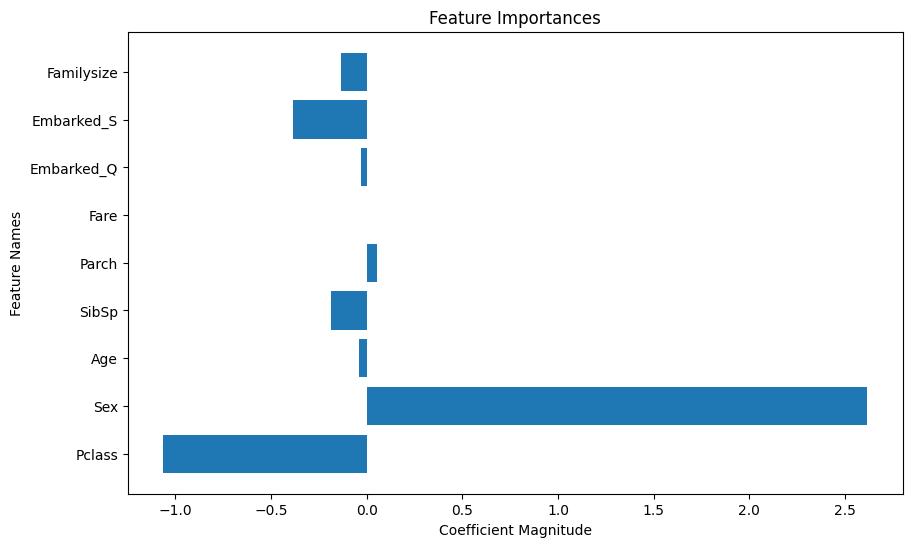

In [31]:
feature_importances = model.coef_[0]
feature_names = data.drop('Survived', axis=1).columns

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Names')
plt.title('Feature Importances')
plt.show()

### How many passengers survived, and how many did not?

In [13]:
total_survivors = data['Survived'].sum()
print("Total number of survivors:", total_survivors)


Total number of survivors: 342


#### This means that 342 people surived in the titanic and 549 didn't

Duplicating column in dataset

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

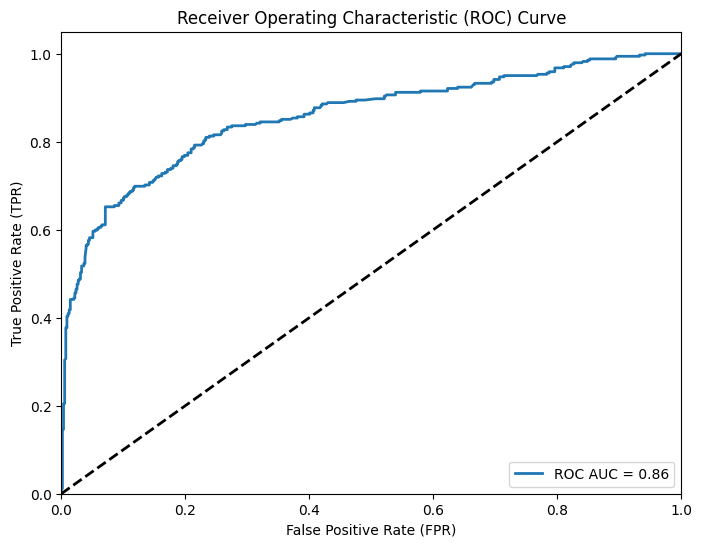

In [33]:
y_prob = model.predict_proba(X)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y, y_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix

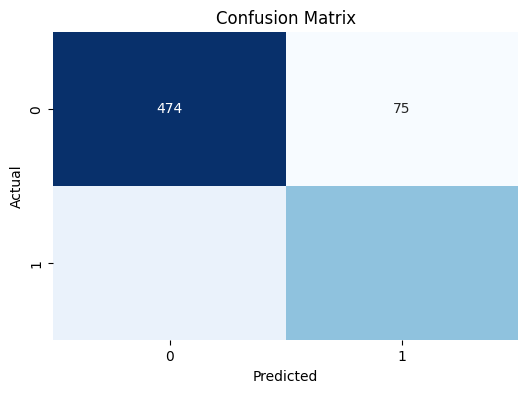

In [35]:
y_pred = model.predict(X)

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix tells us how well the Titanic model did in predicting who survived and who didn't. It shows that the model was good at correctly guessing people who didn't survive, but it often missed predicting those who did survive. Specifically, the model correctly identified 240 survivors, but it mistakenly said 102 survivors didn't make it. It also correctly said 474 people didn't survive, but it wrongly predicted that 75 of them did. So, it's better at predicting non-survivors but not as good at spotting survivors.